In [1]:

#############   PYHMC_flash_ideeal.pynb ##############################################
# Jozef Gembarovic 2/24/2016
######################################################################################
#  conda install -c https://conda.anaconda.org/omnia pyhmc
######################################################################################

# define your probability distribution
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(1234)
import pymc

def flash1D(t, a): # One dimensional ideal model (an instantaneous heat pulse, no heat losses)
    suma =0.0
    for n in range(1, 50):
        suma = suma + (-1)**n*np.exp(-((n*np.pi)**2*a*t))
    return (1+2.0*suma)
def gflash1D(t, a): # One dimensional ideal model (an instantaneous heat pulse, no heat losses)
    grads =0.0
    for n in range(1, 50):
        grads += (-1)**(n+1)*((n*np.pi)**2*t)*np.exp(-((n*np.pi)**2*a*t))
    return (grads)


def logprob(x, t, y, sigma, N ):
#    logp = -0.5 * np.sum(ivar * x**2)
#    grad = -ivar * x
    # ivar = [Tmax, alpha]
    yey = np.zeros(N)
    ey = np.zeros(N)
    ey0 = np.zeros(N)
    ey1 = np.zeros(N)
    grad = np.zeros(2)
    for i in range(0, 9):
        ey[i] = x[0]*flash1D(t[i],x[1])
        ey0[i] = ey[i]*1.005
        ey1[i] = x[0]*flash1D(t[i],(x[1]*(1.005)))
    yey = np.matrix(y - ey)
    yey0 = np.matrix(y - ey0)
    yey1 = np.matrix(y - ey1)
    logp = -(yey * (np.transpose(yey)))/(2*sigma**2)
    logpx0 = -(yey0 * (np.transpose(yey0)))/(2*sigma**2)
    logpx1 = -(yey1 * (np.transpose(yey1)))/(2*sigma**2)
    
    grad = np.array([(logp - logpx0)/x[0],(logp - logpx1)/x[1]])
    grad = np.array([grad.item(0), grad.item(1)])
    return logp.item(0), -grad

# run the sampler
from pyhmc import hmc
N=20 # why it is not working properly for N > 30 ???
t = np.linspace(0.001,1.6,N)
sigma = 0.05
y = np.asarray(3.0*flash1D(t,0.5))+np.random.normal(0,sigma,N)
logprob([3.0,0.5],t,y,sigma, N)
#plt.plot(t,y) ;                       
#y*np.transpose(y)

(-19263.404439904585, array([-0.00163136,  0.20069757]))

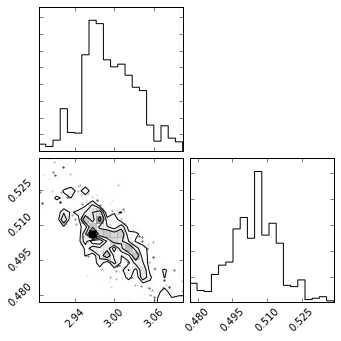

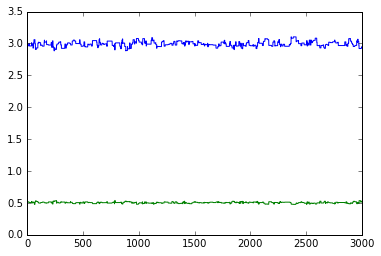

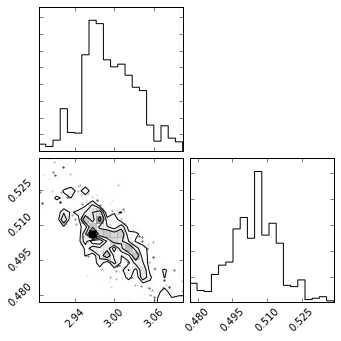

In [7]:
x00 = np.asarray([2.1, 0.1])
samples = hmc(logprob, x0=x00, args=(t,y,sigma,N,), epsilon=0.05, n_samples=3e3, display=0, n_burn=500)
# Optionally, plot the results (requires an external package)
import corner  # pip install triangle_plot
plt.plot(samples)
corner.corner(samples);
#figure = triangle.corner(samples)
#figure.savefig('triangle.png')

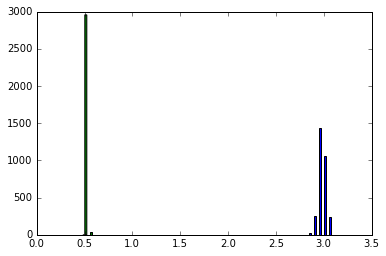

In [8]:
plt.hist(samples,50);

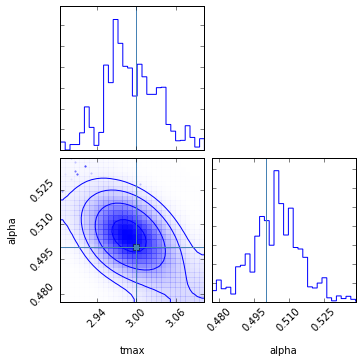

In [9]:
import corner
figure = corner.corner(samples, color="b", bins=30, filled= False, smooth=(5),fill_contours=False,
                       labels=['tmax','alpha'], 
                truths=[3.0, 0.5])
figure.savefig('pyhmc_flash_ideal_triangle.png')

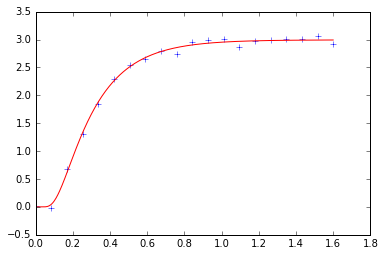

In [10]:
# reconstruct the temperature rise
# calculate average values of tmax and alpha
m = np.mean(samples, axis=0)
std = np.std(samples, axis=0)
ttheor = np.linspace(0.001,1.6,500)
ytheor = m[0]*flash1D(ttheor,m[1])
plt.plot(t,y,"+", ttheor,ytheor,"red") ;

In [6]:
m, std

(array([ 2.97968627,  0.50708128]), array([ 0.04706966,  0.01197392]))